In [177]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib notebook

palette = np.array(sns.color_palette(None, 8))*255
classes = open('./EndoCV/EAD2020-Phase-II-Segmentation-VALIDATION/class_list_bbox.txt', 'r').read().strip().split('\n')

def get_bb(label, shape):
    try:
        m, n = shape
    except ValueError:
        m, n, _ = shape
    except Exception as e:
        raise(e)
    cls, x, y, w, h = label

    x1 = (x-w/2.)
    x2 = x1 + w
    y1 = (y-h/2.)
    y2 = y1 + h

    x1 = int(x1 * n) ; x2 = int(x2*n)
    y1 = int(y1 * m) ; y2 = int(y2*m)
#     print(x1, y1, x2, y2)  #DEBUG
    return int(cls), (x1, y1), (x2, y2)


def show_labeled_img(img_path, label_path):
    img = cv2.imread(img_path)
    assert img is not None, "Empty image/ Image does not exist."
    cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    labels = np.loadtxt(label_path)

    for i in range(len(labels)):
        cls, pt1, pt2 = get_bb(labels[i], img.shape)
        cv2.rectangle(img, pt1, pt2, tuple(palette[cls]), 2)
        cv2.putText(img, classes[cls],pt1,0,0.6,tuple(palette[cls]), 2)

    plt.imshow(img)

<IPython.core.display.Javascript object>


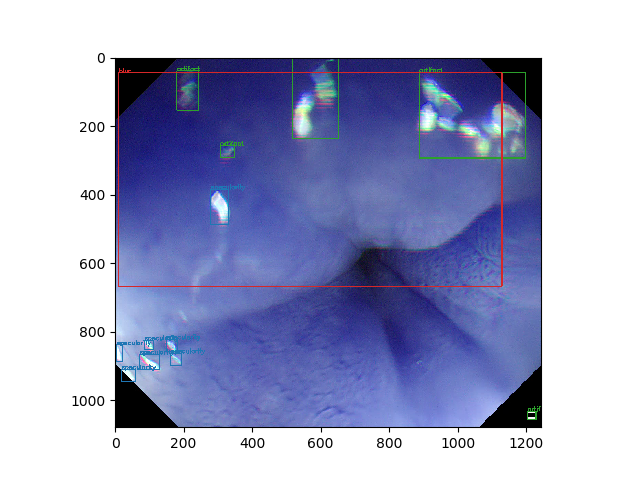

In [179]:
i = 10040
img_path = f'./EndoCV/EAD2020-Phase-II-Segmentation-VALIDATION/originalImages/EAD2020_MP{i}.jpg'
label_path = f'./EndoCV/EAD2020-Phase-II-Segmentation-VALIDATION/bbox/EAD2020_MP{i}.txt'
show_labeled_img(img_path, label_path)